<a href="https://colab.research.google.com/github/Shaheer04/Neural-Networks-Practice/blob/main/first_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import BatchNormalization


In [4]:
dataset = pd.read_csv('housing_price_dataset.csv')

In [5]:
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [6]:
dataset

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [9]:
dataset.sum().isnull()

SquareFeet      False
Bedrooms        False
Bathrooms       False
Neighborhood    False
YearBuilt       False
Price           False
dtype: bool

In [11]:
dataset.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [14]:
X = dataset[['SquareFeet','Bedrooms','YearBuilt']]
Y = dataset[['Price']]

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [64]:
X_scaled

array([[ 0.20786058,  0.44906695, -0.79175085],
       [ 0.78648033, -0.44673786, -0.26084154],
       [-0.25434018, -1.34254267, -0.74348636],
       ...,
       [ 1.6900307 ,  1.34487176, -1.12960223],
       [ 1.0245311 ,  1.34487176, -0.0677836 ],
       [-0.75476808,  1.34487176,  1.23535743]])

In [65]:
Y_scaled

array([[-0.1244012 ],
       [-0.39155083],
       [ 1.07778462],
       ...,
       [ 2.09194862],
       [ 2.04469595],
       [-0.04214206]])

In [15]:
X.head()

,SquareFeet,Bedrooms,YearBuilt
0,2126,4,1969
1,2459,3,1980
2,1860,2,1970
3,2294,2,1996
4,2130,5,2001


In [16]:
Y.head()


,Price
0,215355.283618
1,195014.221626
2,306891.012076
3,206786.787153
4,272436.239065


In [66]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X_scaled,Y_scaled, test_size= 0.3, random_state=30)

In [67]:
model = Sequential([

        tf.keras.Input(shape=(3,)),
        Dense(64, activation='relu', name="L1"),
        Dense(32, activation='relu',  name="L2"),
        Dense(1, activation='linear',  name="L3" )
])

In [68]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()

print(f"W1 = {W1.shape}:\n",W1, f"b1 = {b1.shape}:\n",b1 )
print(f"W2 = {W2.shape}:\n",W2, f"b2 = {b2.shape}:\n",b2 )

W1 = (3, 64):
 [[-0.06809969 -0.18267083 -0.08924757 -0.05522919 -0.28145456 -0.0053091
  -0.15931809  0.2944343   0.21145272 -0.1851961   0.24746054  0.04012287
   0.2376625  -0.21950243  0.00337303  0.03129342  0.2911483  -0.02084008
   0.13088578  0.26407903 -0.09089577 -0.07154156  0.22915846 -0.27042788
   0.17921755 -0.08471736  0.09342554 -0.11136164  0.17992881  0.21302462
   0.0523648  -0.00063619  0.20626915 -0.07927813 -0.15987639 -0.10282777
   0.2304998  -0.21909532 -0.15772255 -0.27506667  0.22876751  0.23910797
   0.23269802 -0.2570322   0.08463332  0.1150468   0.23093915 -0.2638956
   0.22924429 -0.00806084 -0.22766423  0.24164456  0.02377883 -0.146081
  -0.15697947 -0.29108387  0.22671533  0.1392163  -0.20336922  0.1973437
   0.16343278 -0.20185372  0.01855296  0.2295953 ]
 [ 0.2413829   0.21156639 -0.29749402  0.24547184  0.11117792  0.19405109
   0.24323827 -0.1546957   0.16587442  0.26871848  0.15700987 -0.07075875
  -0.0272916  -0.2172156  -0.22955407  0.272721   -

In [70]:
model.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
    )

history = model.fit(
    X_train,Y_train,
    epochs=15,
    validation_data=(X_test,Y_test)
)

Epoch 1/15
1094/1094 [==============================] - 7s 3ms/step - loss: 0.4360 - val_loss: 0.4259
Epoch 2/15
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4358 - val_loss: 0.4281
Epoch 3/15
1094/1094 [==============================] - 3s 2ms/step - loss: 0.4354 - val_loss: 0.4274
Epoch 4/15
1094/1094 [==============================] - 5s 4ms/step - loss: 0.4353 - val_loss: 0.4292
Epoch 5/15
1094/1094 [==============================] - 4s 3ms/step - loss: 0.4354 - val_loss: 0.4263
Epoch 6/15
1094/1094 [==============================] - 4s 4ms/step - loss: 0.4350 - val_loss: 0.4262
Epoch 7/15
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4348 - val_loss: 0.4258
Epoch 8/15
1094/1094 [==============================] - 3s 3ms/step - loss: 0.4349 - val_loss: 0.4262
Epoch 9/15
1094/1094 [==============================] - 3s 2ms/step - loss: 0.4350 - val_loss: 0.4258
Epoch 10/15
1094/1094 [==============================] - 3s 2ms/step - loss: 0.434

<function matplotlib.pyplot.show(close=None, block=None)>

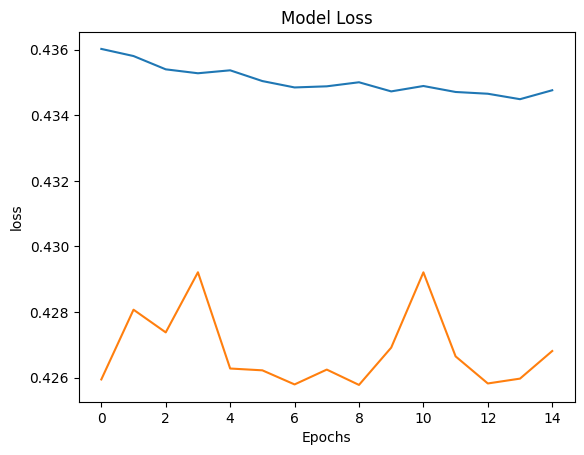

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show